In [1]:
%load_ext autoreload
%autoreload 2
import os
from stacathome import MaxiCube

In [3]:
aoi = 'germany'
requested_bands = ['B02', 'B03', 'B04', 'B8A']
resolution = 0.00018  # 20  # 0.00018
crs = 4326  # 32737  # 4326
chunksize_xy = 256
chunksize_t = 1000

out_path = '/Net/Groups/BGI/data/DataStructureMDI/DATA/Incoming/Sentinel/_2/S2A_L2A/ForSites/Sentinel2tiles'
os.makedirs(out_path, exist_ok=True)

#zarr_store = '/Net/Groups/BGI/scratch/mzehner/VCI_Somalia/Somalia_S2_2014_2026.zarr'

mxc = MaxiCube(aoi=aoi,
               requested_bands=requested_bands,
               crs=crs,
               resolution=resolution,
               chunksize_xy=chunksize_xy,
               chunksize_t=chunksize_t,
               path=out_path,
               # zarr_path=zarr_store,
               )

Loading local assets


In [4]:
mxc.plot(subset_chunks_by=5)

## each chunk can be adressed by id, or lat lon (will fetch nearest one)

In [5]:
otf_cube = mxc.load_otf_cube(subset=8100)
otf_cube

<xarray.Dataset> Size: 308MB
Dimensions:      (latitude: 256, longitude: 256, time: 588)
Coordinates:
  * latitude     (latitude) float64 2kB 8.928 8.927 8.927 ... 8.882 8.882 8.882
  * longitude    (longitude) float64 2kB 48.49 48.49 48.49 ... 48.54 48.54 48.54
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 5kB 2015-10-05T07:13:46.027000 ... 202...
Data variables:
    B02          (time, latitude, longitude) uint16 77MB dask.array<chunksize=(588, 256, 256), meta=np.ndarray>
    B03          (time, latitude, longitude) uint16 77MB dask.array<chunksize=(588, 256, 256), meta=np.ndarray>
    B04          (time, latitude, longitude) uint16 77MB dask.array<chunksize=(588, 256, 256), meta=np.ndarray>
    B8A          (time, latitude, longitude) uint16 77MB dask.array<chunksize=(588, 256, 256), meta=np.ndarray>

In [6]:
otf_cube = mxc.load_otf_cube(subset=(8.88201, 48.53925))
otf_cube

8100


<xarray.Dataset> Size: 308MB
Dimensions:      (latitude: 256, longitude: 256, time: 588)
Coordinates:
  * latitude     (latitude) float64 2kB 8.928 8.927 8.927 ... 8.882 8.882 8.882
  * longitude    (longitude) float64 2kB 48.49 48.49 48.49 ... 48.54 48.54 48.54
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 5kB 2015-10-05T07:13:46.027000 ... 202...
Data variables:
    B02          (time, latitude, longitude) uint16 77MB dask.array<chunksize=(588, 256, 256), meta=np.ndarray>
    B03          (time, latitude, longitude) uint16 77MB dask.array<chunksize=(588, 256, 256), meta=np.ndarray>
    B04          (time, latitude, longitude) uint16 77MB dask.array<chunksize=(588, 256, 256), meta=np.ndarray>
    B8A          (time, latitude, longitude) uint16 77MB dask.array<chunksize=(588, 256, 256), meta=np.ndarray>

In [4]:
mxc.items_local_global[0]

<Item id=S2B_MSIL2A_20240823T065619_R063_T38PRR_20240823T113539>

In [5]:
from dask_jobqueue import SLURMCluster
from dask.distributed import Client as daskClient
cluster = SLURMCluster(
    queue='work',                  # Specify the SLURM queue
    processes=1,                # Number of processes per job
    cores=1,                          # Number of cores per job
    memory='2GB',                    # Memory per job
    walltime='03:00:00',              # Job duration (hh:mm:ss)
)

# Scale up the number of workers
# cluster.scale(jobs=8)  # Adjust the number of jobs/workers
cluster.adapt(minimum=0, maximum=8)

# Create a Dask client that connects to the cluster
client = daskClient(cluster)

# Check cluster status
cluster

/Net/Groups/BGI/scratch/mzehner/envs/minicuber/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44121 instead
  warnings.warn(


SLURMCluster(67b4473c, 'tcp://10.0.30.56:46333', workers=0, threads=0, memory=0 B)

In [6]:
from tqdm import tqdm
process = []

process.extend(mxc.download_all('2022-08-01', '2022-08-03', subset=12080, client=client))

In [8]:
mxc._update_items_local_global(process)


Updated local items, 2768 items


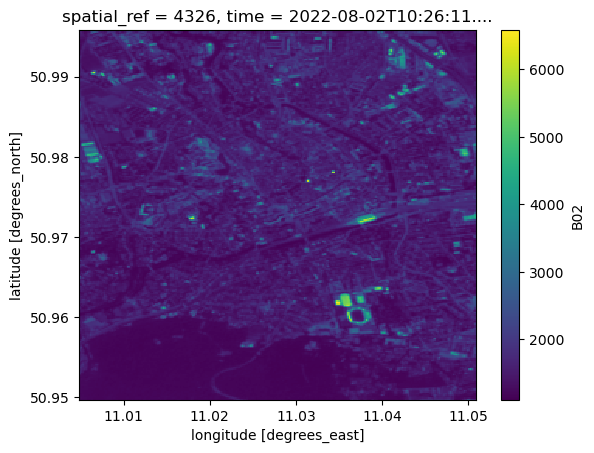

In [9]:
otf_cube = mxc.load_otf_cube(subset=12080, enlarge_by_n_chunks=0)
otf_cube.B02.isel(time=0).plot.imshow()